## Edwin Prieto - Algoritmos de Aprendizaje no Supervisado

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Analisis Exploratorio

In [4]:
dataset.shape

(200, 5)

In [14]:
data=dataset.drop(['Gender'], axis=1)

In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Procesador Datos Limpiados

In [17]:
data.isna().sum() ##Valores nulos

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
data.dropna() ##Elimina datos nulos

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


## 3. Seleccionar las características más relevantes

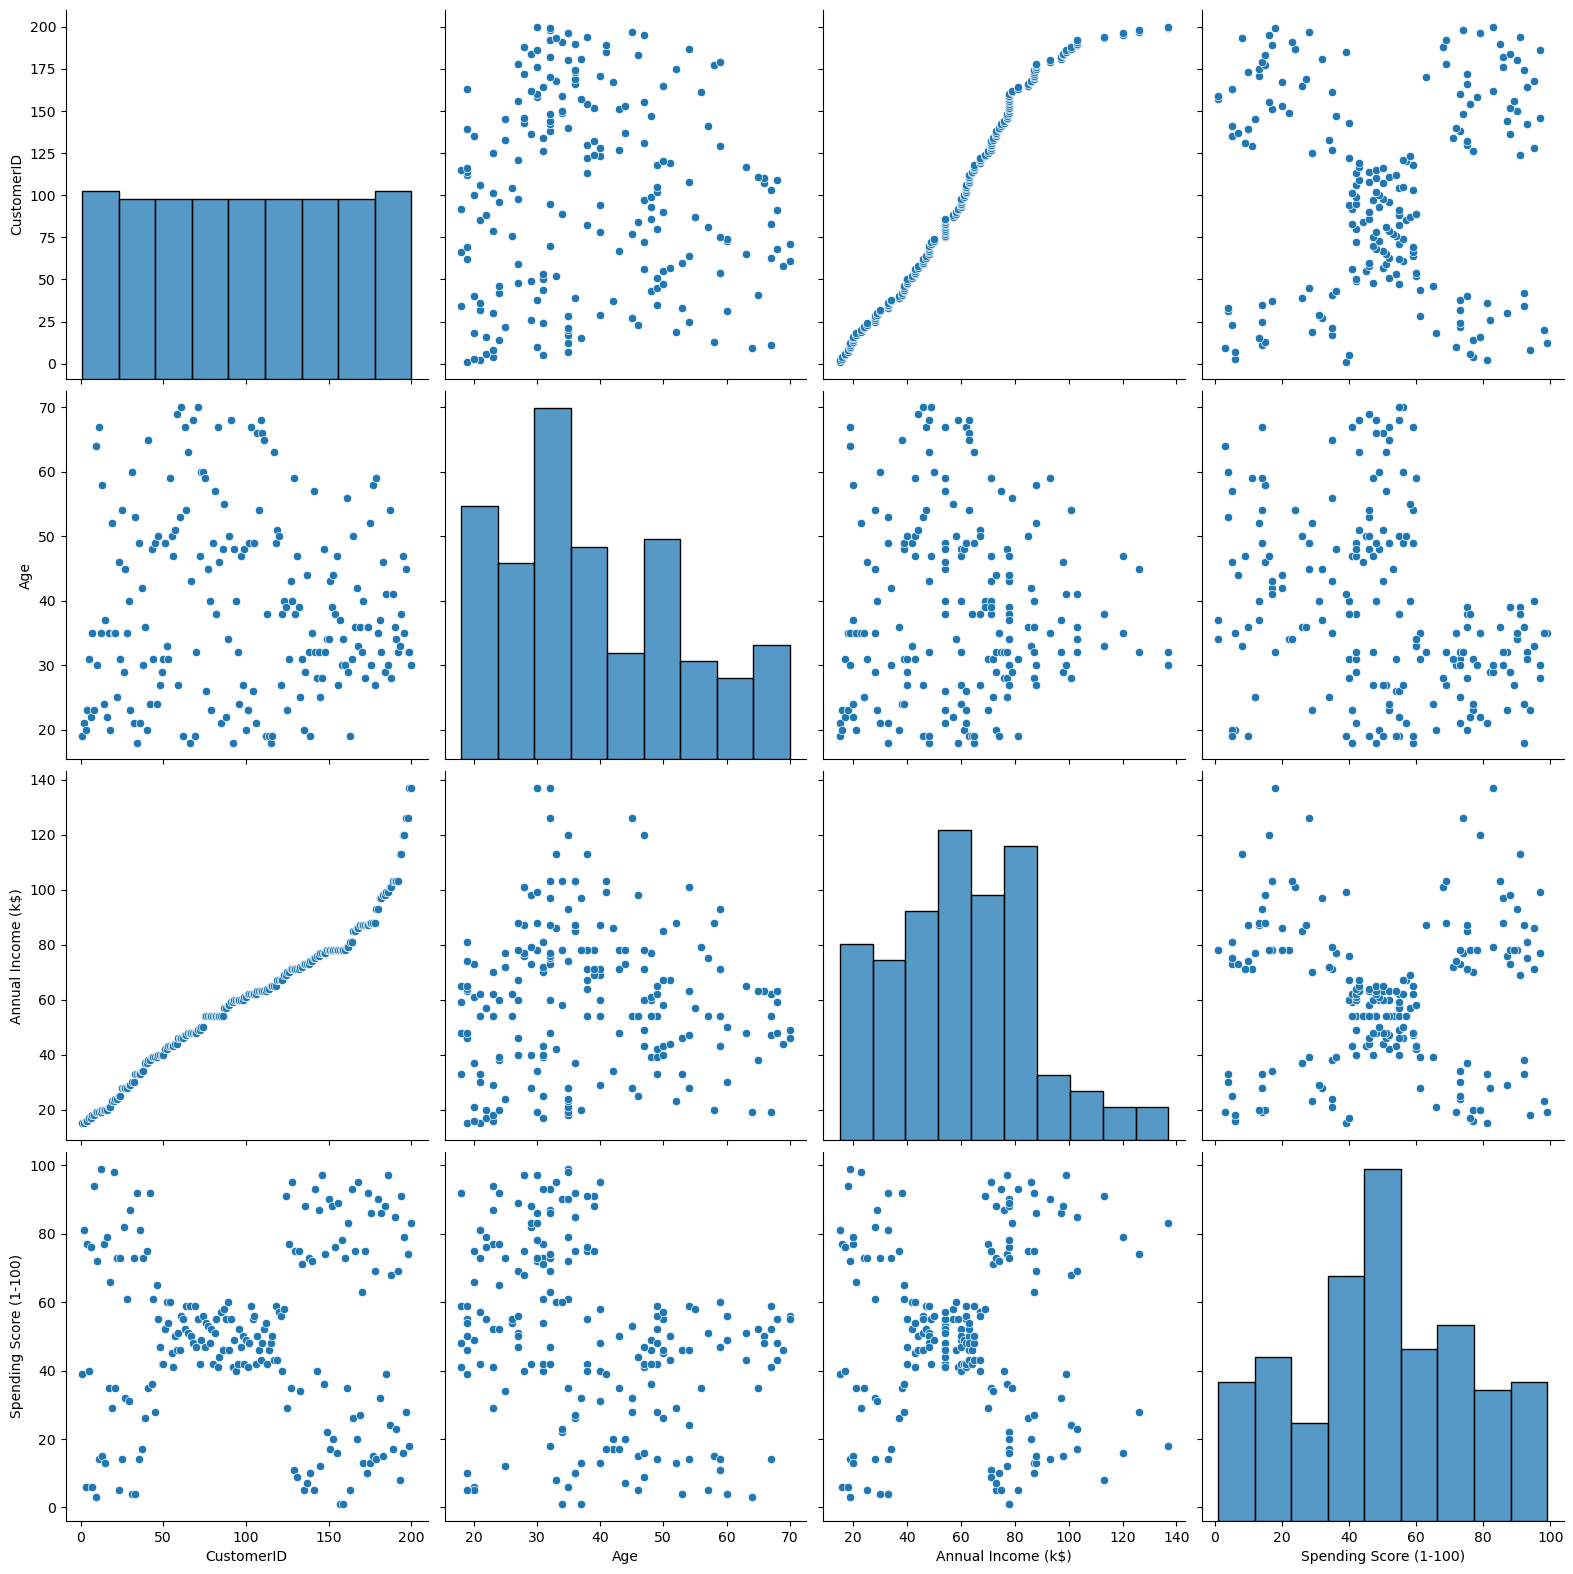

In [19]:
sns.pairplot(data.dropna(), size=4, kind='scatter')

In [20]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

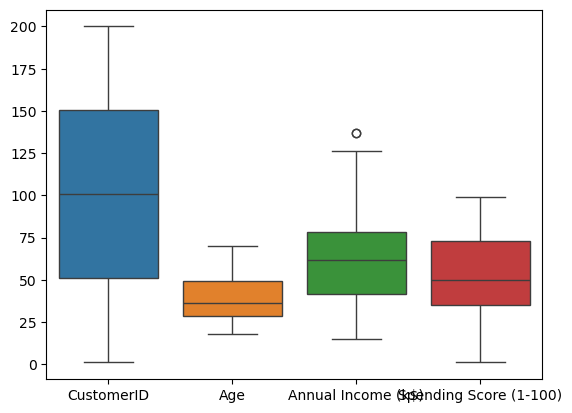

In [21]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [23]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## 4. Entrenar Modelo - 5. Desempeño del modelo - 6. Graficas

## K-Means

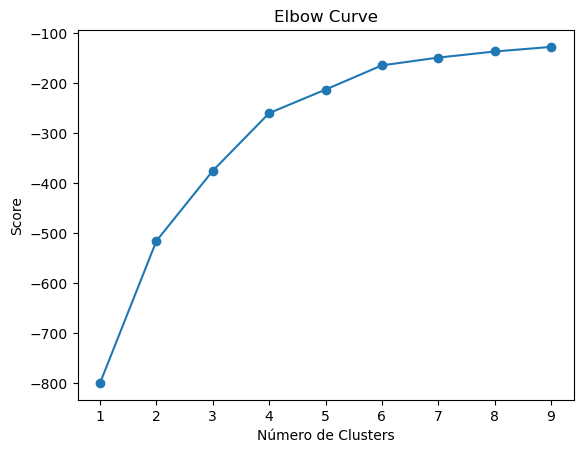

In [27]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot (Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 1 Prueba

In [40]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.06522456, -0.44191719,  0.99158305,  1.23950275],
       [-1.30022466, -0.79806499, -1.27271319,  0.44655287],
       [ 1.10728918,  0.20350983,  1.05609358, -1.27778394],
       [-0.04871454, -0.89528945, -0.03449562, -0.05507809],
       [-0.53739827,  1.19806304, -0.48141695, -0.32242328]])

In [45]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

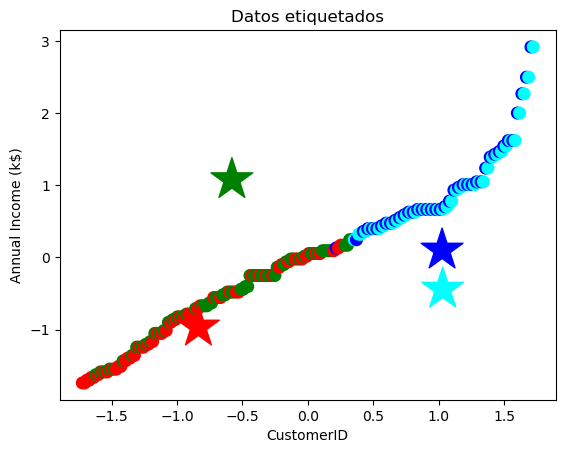

In [70]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

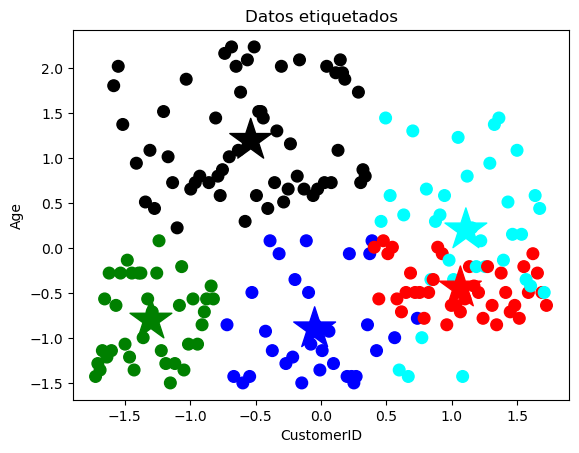

In [47]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

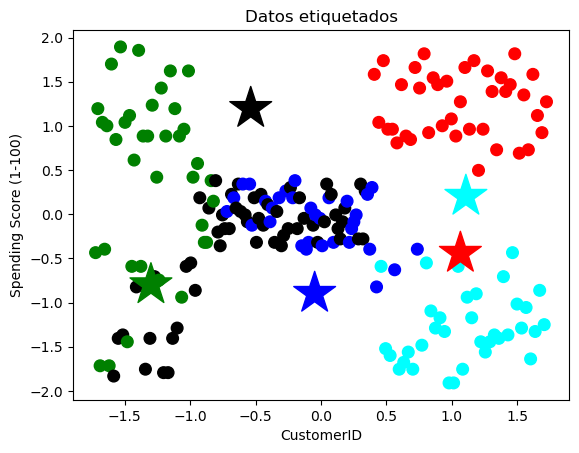

In [48]:
f1 = X['CustomerID'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.show()

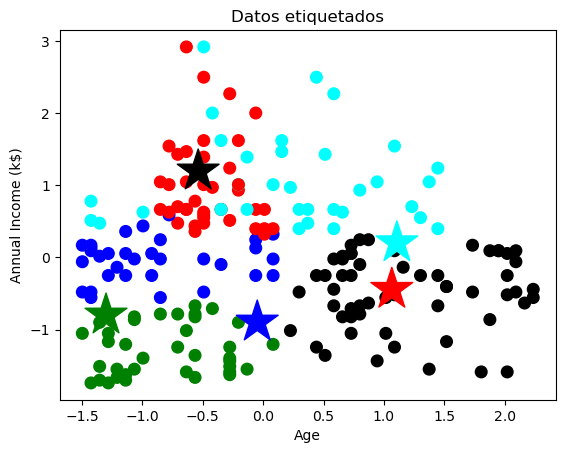

In [49]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

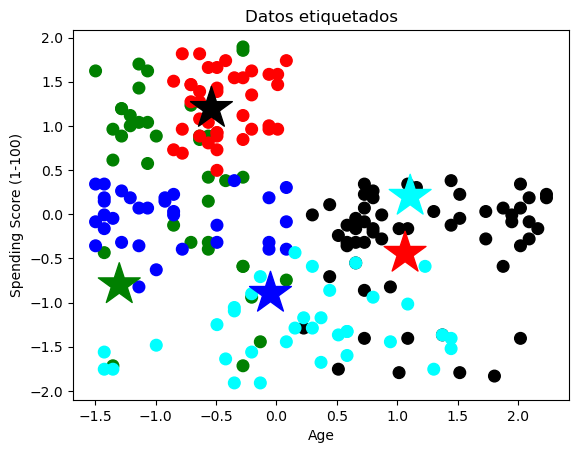

In [50]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

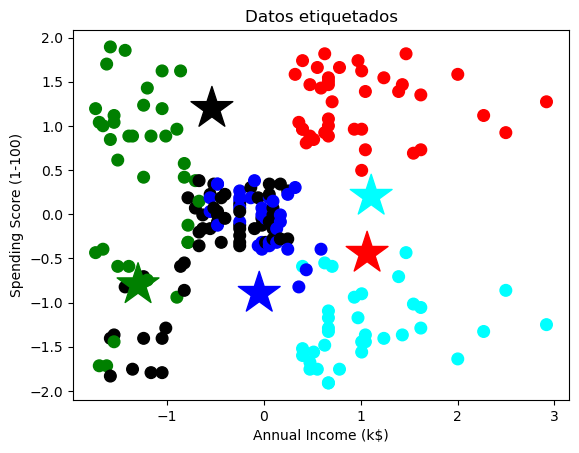

In [51]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [58]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[3]
['blue']


In [59]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.39431076179602337
Índice de Calinski-Harabasz: 134.67612922977526
Inertia (suma de cuadrados dentro de los clusters): 212.6196532836675
Davies-Bouldin Index: 0.8643273612771238


## 2 Prueba

In [87]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.02668595,  0.10226753,  0.96816757, -1.18211652],
       [-0.87036641, -0.90904474, -0.83756451,  0.28792658],
       [ 1.03142803, -0.43908961,  0.95706585,  1.1919166 ],
       [-0.52769496,  1.16024842, -0.46970394, -0.31965278]])

In [89]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

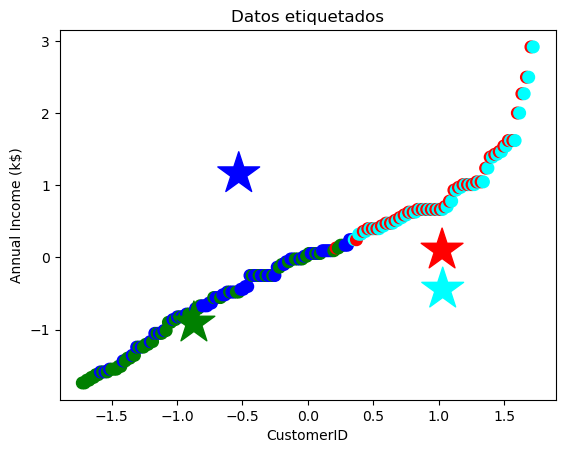

In [90]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

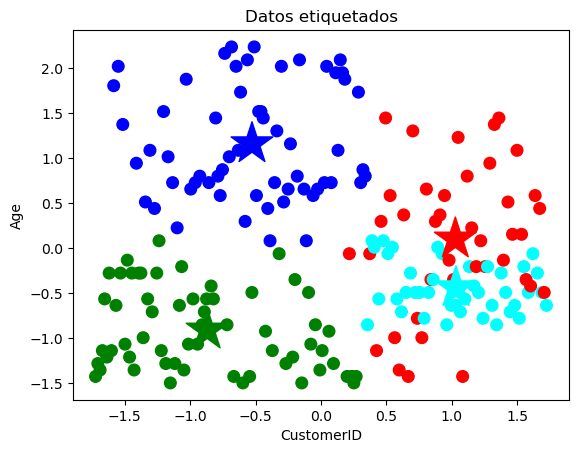

In [91]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

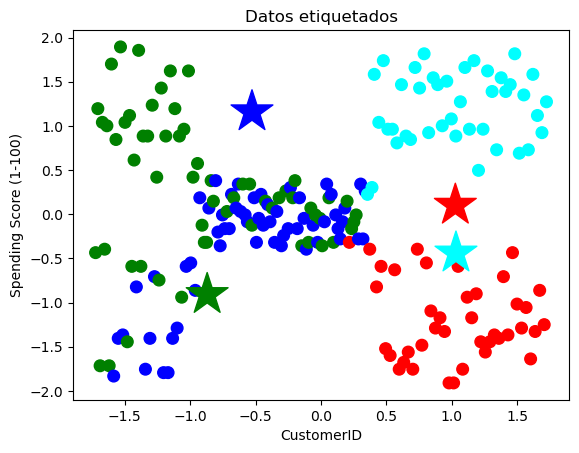

In [92]:
f1 = X['CustomerID'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.show()

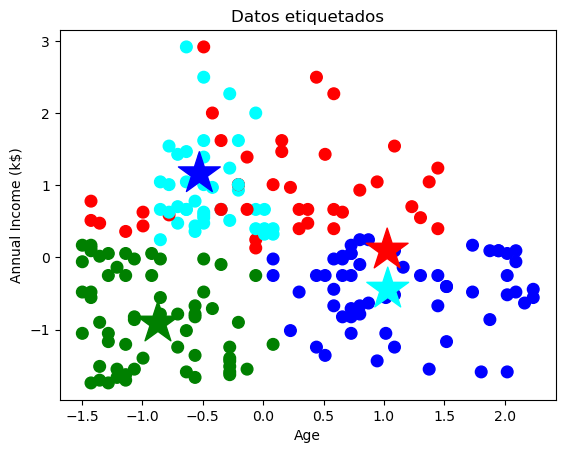

In [93]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

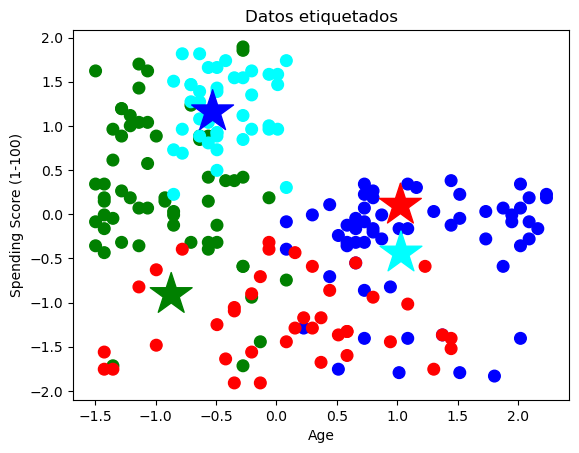

In [96]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

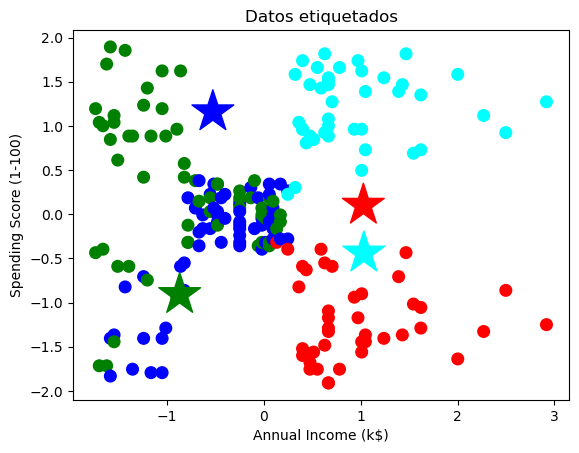

In [97]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [98]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[3]
['blue']


In [99]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.41358360614845524
Índice de Calinski-Harabasz: 135.91992784022946
Inertia (suma de cuadrados dentro de los clusters): 259.7059364995401
Davies-Bouldin Index: 0.9075610618485941


## Hierarchical clustering

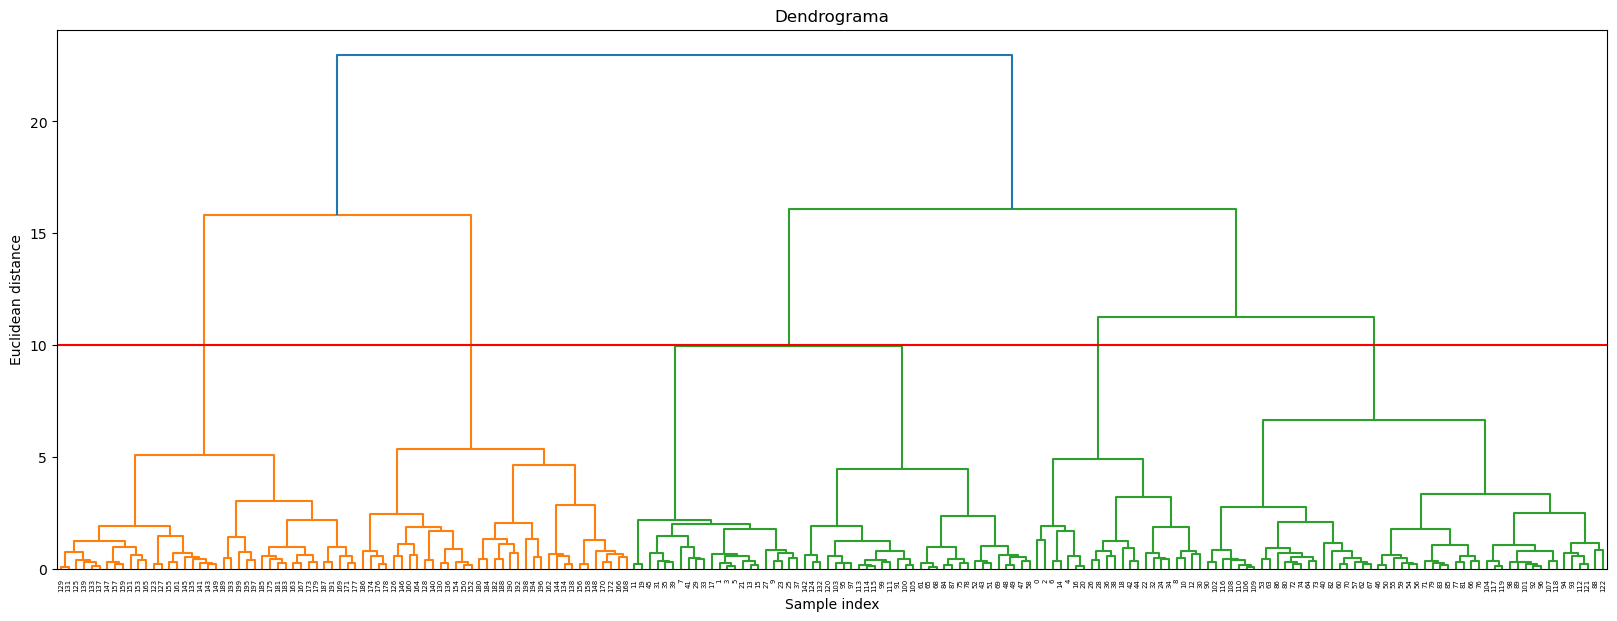

In [102]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20,7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [104]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [106]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

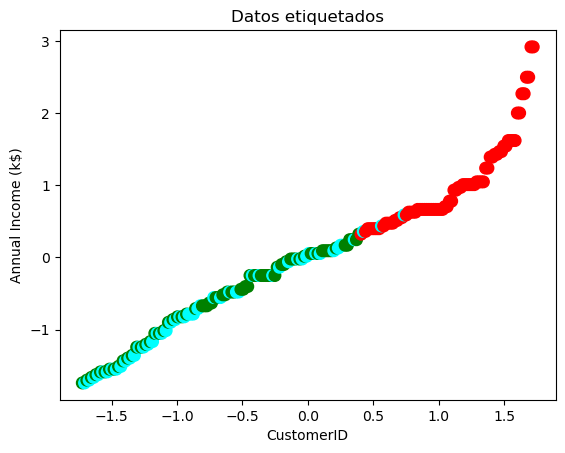

In [108]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel ('Annual Income (k$)')
plt.show()

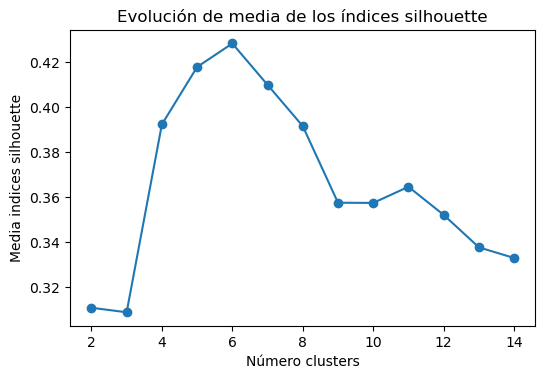

In [113]:
# Método silhouette para identificar el número optimo de clusters

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    #affinity = 'euclidean',
                    linkage = 'ward',
                    n_clusters = n_clusters
            )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media indices silhouette');


In [115]:
#Calcular medidas de calidad para Clustering Jerárquico
print("nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

nMedidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [116]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [117]:
#Calcular medidas de calidad para Clustering Jerárquico
print("nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

nMedidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.42832993481997816
Índice de Calinski-Harabasz: 143.6561433644843
Davies-Bouldin Index: 0.787609522022419


In [123]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


## 7. Interpretaciones, analizar y documentar los resultados obtenidos.

## K-Means

In [5]:
# Con 4 Clusters 

# 1. Puntaje de Silueta: 0.41 El puntaje de silueta varía entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien agrupados, mientras que valores cercanos a 0 sugieren que los puntos están en el límite entre dos clusters y valores negativos indican que los puntos pueden estar en el cluster equivocado.
#                        Un puntaje de 0.41 sugiere que los clusters están relativamente bien definidos, pero aún hay cierto solapamiento entre ellos. No es un puntaje excepcional, lo que indica que puede haber oportunidad de mejorar la separación de los clusters.

# 2. Índice de Calinski-Harabasz: 135.92 Este índice también se conoce como el criterio de varianza entre-cluster y dentro-cluster. Cuanto mayor sea el valor, mejor será la separación de los clusters.
#                                 Un índice de 135.92 indica que hay una buena separación entre los clusters en comparación con la dispersión dentro de ellos. Sin embargo, siempre es útil compararlo con índices obtenidos a partir de diferentes configuraciones de clustering o diferentes números de clusters para tener una perspectiva más clara.

# 3. Inercia: 259.71 La inercia es la suma de las distancias al cuadrado de cada punto en un cluster a su centroide. Un valor más bajo indica que los puntos de un cluster están más cerca de su centroide.
#                   Este valor de inercia puede ser considerado en función del número de clusters utilizados. Si se ha aplicado un número relativamente alto de clusters, se esperaría que la inercia disminuyera. En este caso, 259.71 podría estar en un rango aceptable, pero es importante evaluar si se sigue la tendencia a la baja (the " elbow method") con el aumento en el número de clusters.

# 4. Índice Davies-Bouldin: 0.91 Este índice mide la calidad del clustering considerando la distancia entre los clusters y la dispersión dentro de cada uno. Un valor más bajo indica mejor separación entre los clusters.
#                          Un índice de 0.91 es relativamente bajo, lo que sugiere que los clusters son relativamente compactos y diferentes entre sí. Sin embargo, como en el caso de los otros índices, debe compararse con los resultados de otros modelos para determinar su efectividad real.

# Con 5 Cluster

# 1. Puntaje de Silueta: 0.39 El puntaje de silueta, que oscila entre -1 y 1, mide cuán bien se separan los clusters. Un valor de 0.39 indica que hay una separación moderada entre los clusters; si bien no es negativo, su cercanía a 0 sugiere que algunos puntos pueden estar ubicados cerca de los límites entre clusters diferentes.
#                       Aunque este puntaje es un poco bajo, indica que hay expectativas de mejora. Un puntaje sobre 0.5 generalmente se considera aceptable, mientras que un valor bajo puede significar que los clusters no están muy bien definidos.
# 2. Índice de Calinski-Harabasz: 134.68 Este índice evalúa la densidad y la separación de los clusters. Cuanto mayor sea el índice, mejor será la calidad del clustering. Un valor de aproximadamente 134.68 sugiere que existe una separación razonable entre los clusters en comparación con la dispersión dentro de ellos.
#                                 Este valor, siendo similar al obtenido previamente (134.92) y fuera del rango bajo, señala que la clasificación tiene una calidad aceptable, pero, como cualquier medida, puede mejorarse. Sería útil compararlo con otros enfoques o configuraciones.
#3. Inercia: 212.62 La inercia es una medida de la compactación de los clusters y se refiere a la suma de las distancias al cuadrado desde cada punto en un cluster hasta su centroide. Un valor más bajo es mejor, indicando que los puntos están más cercanos a los centroides.
#                   La inercia de 212.62 puede ser considerado en el contexto del número de clusters. Si has usado un número moderado de clusters, este resultado podría ser razonable. Sin embargo, siempre es bueno utilizar la técnica del codo para observar si la inercia sigue disminuyendo al aumentar el número de clusters.
#4. Índice Davies-Bouldin: 0.86 Este índice mide la relación entre la separación de diferentes clusters y la dispersión de cada uno. Valores más bajos son mejores, ya que indican que los clusters son más compactos y están más separados.
#                               Un índice de 0.86 sugiere que existe una buena separación entre los clusters y que los clusters son razonablemente compactos. Comparado con el índice anterior, este valor es más atractivo; aunque hay espacio para mejora, no es preocupante.

## Hierarchical clustering

In [6]:
# 1. Puntaje de Silueta: 0.43 El puntaje de silueta mide la calidad del clustering, variando entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien agrupados, cerca de su cluster, y lejos de otros clusters. Un puntaje de 0.43 indica una separación aceptable entre los clusters, aunque no es excelente.
#                            Aunque es mejor que el puntaje de silueta de 0.39 que obtuviste con K-Means, lo que sugiere que el clustering jerárquico proporciona una mejor separación entre los clusters, aún hay espacio para mejorar. Un porcentaje mayor a 0.5 es francamente deseable para asegurar una clasificación de calidad.

#2. Índice de Calinski-Harabasz: 143.66 Este índice, que evalúa la separación y la cohesión de los clusters, debe ser lo más alto posible. Un valor de 143.66 indica una buena relación entre la varianza entre clusters y la varianza dentro de clusters.
#                                Este valor es también superior al que obtuviste con el algoritmo K-Means (134.68), lo que sugiere que el clustering jerárquico ha logrado una mejor separación entre los clusters en relación a la dispersión dentro de ellos. En general, esto es una señal positiva acerca de la calidad del clustering.

#3. Índice Davies-Bouldin: 0.79 Este índice mide la compactación y la separación entre los clusters; un valor más bajo es mejor. Un valor de 0.79 implica que los clusters son relativamente compactos y bien separados entre sí.
#                               Este valor es más bajo que el de K-Means (0.86), lo que sugiere que el clustering jerárquico ha logrado crear grupos más homogéneos y bien diferenciados. Es un buen indicio de la calidad del modelo.#